In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import warnings
import yfinance as yf

In [2]:
df1=pd.read_csv ('clean_df.csv')

In [3]:
df1.set_index(['symbol_id'],inplace=True)
df1.columns = [c.replace(' ', '_') for c in df1.columns]
df1

,time_close,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,10Y_Treasury,Gold,Oil,EUR_USD
symbol_id,,,,,,,,,,,,,,,,,
BTCB_4023,2020-09-24,10475.684721,1.138708e+04,0.000000e+00,9,24,3,1,-0.010546,1.915524,0.039526,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
BTCB_4023,2020-09-25,10889.743248,1.384086e+03,0.000000e+00,9,25,4,1,0.039526,-0.878451,-0.029131,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-26,10572.518703,3.690903e+03,0.000000e+00,9,26,5,0,-0.029131,1.666671,0.019034,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-27,10773.752004,6.771302e+03,0.000000e+00,9,27,6,0,0.019034,0.834592,0.006752,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-28,10846.499092,3.646642e+03,0.000000e+00,9,28,0,1,0.006752,-0.461456,-0.013387,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FTT_4195,2022-09-29,24.068050,7.976498e+07,3.224523e+09,9,29,3,1,0.015881,-0.219820,0.009143,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
FTT_4195,2022-09-30,24.288116,7.723532e+07,3.254006e+09,9,30,4,1,0.009143,-0.031714,-0.002232,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
FTT_4195,2022-10-01,24.233912,7.605522e+07,3.246744e+09,10,1,5,0,-0.002232,-0.015279,0.000811,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [4]:
dfcoin=df1.loc['XMR_328']
dfcoin.rename(columns={'10Y_Treasury':'TY_Treasury'}, inplace=True)
dfcoin

/tmp/ipykernel_178/891104036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoin.rename(columns={'10Y_Treasury':'TY_Treasury'}, inplace=True)


,time_close,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,TY_Treasury,Gold,Oil,EUR_USD
symbol_id,,,,,,,,,,,,,,,,,
XMR_328,2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
XMR_328,2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
XMR_328,2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
XMR_328,2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
XMR_328,2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XMR_328,2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
XMR_328,2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
XMR_328,2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


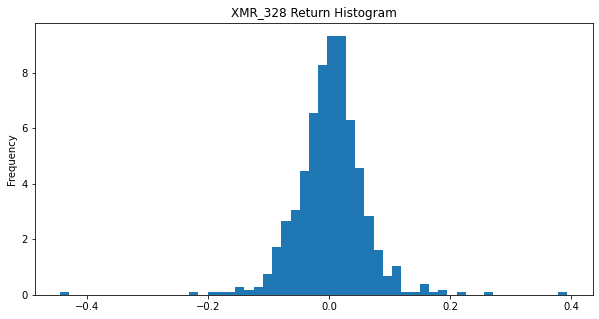

In [5]:
fig, ax = plt.subplots(figsize = (10, 5))
dfcoin['tomorrow_change'].plot.hist(density=1, bins=55, ax=ax)
plt.title('XMR_328 Return Histogram')
plt.show() 

In [6]:
#Create dummy and add it in dataframe
dfcoin['TomorrowTrend'] = pd.cut(x=dfcoin['tomorrow_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfcoin['Tomorrow'] = dfcoin['TomorrowTrend'].map({'Decrease':0,'Increase':1})
dfcoin['Tomorrow'] = dfcoin['Tomorrow'].astype(float)
dfcoin.drop('TomorrowTrend', axis=1, inplace=True)
dfcoin.set_index(['time_close'],inplace=True)
dfcoin.drop('tomorrow_change', axis=1, inplace=True)
result=dfcoin.dtypes
dfcoin

/tmp/ipykernel_178/3150351059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoin['TomorrowTrend'] = pd.cut(x=dfcoin['tomorrow_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_178/3150351059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoin['Tomorrow'] = dfcoin['TomorrowTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_178/3150351059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,SPY,VIX,TY_Treasury,Gold,Oil,EUR_USD,Tomorrow
time_close,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854,1.0
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,1.0
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,1.0
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,1.0
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817,1.0
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956,0.0
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956,0.0


In [7]:
#Adding other coins in dataframe
dfBTC=df1.loc['BTC_1']
dfBTC.set_index(['time_close'],inplace=True)
dfBTC.rename(columns={'close':'BTC_close'}, inplace=True)
dfBTC1=dfBTC['BTC_close']

dfETH=df1.loc['ETH_1027']
dfETH.set_index(['time_close'],inplace=True)
dfETH.rename(columns={'close':'ETH_close'}, inplace=True)
dfETH1=dfETH['ETH_close']

dfLTC=df1.loc['LTC_2']
dfLTC.set_index(['time_close'],inplace=True)
dfLTC.rename(columns={'close':'LTC_close'}, inplace=True)
dfLTC1=dfLTC['LTC_close']

dfnew=pd.concat([dfcoin,dfBTC1,dfETH1,dfLTC1],axis=1)
dfnew

/tmp/ipykernel_178/4014364420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC.rename(columns={'close':'BTC_close'}, inplace=True)
/tmp/ipykernel_178/4014364420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH.rename(columns={'close':'ETH_close'}, inplace=True)
/tmp/ipykernel_178/4014364420.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLTC.rename(columns={'close':'LTC_close'}, inplace=True)


,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,SPY,VIX,TY_Treasury,Gold,Oil,EUR_USD,Tomorrow,BTC_close,ETH_close,LTC_close
time_close,,,,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854,1.0,10295.054804,322.801017,43.575650
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,1.0,10773.534000,348.029329,44.790372
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,1.0,10668.141934,351.552190,46.090238
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,1.0,10769.604523,359.182175,46.340146
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535,0.0,10881.984006,358.283277,46.434781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817,1.0,19445.124438,1333.964086,53.258766
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956,0.0,19532.627889,1336.776474,53.855640
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956,0.0,19400.000434,1327.829013,53.365201


In [8]:
dfnew.drop('day_of_week',axis=1, inplace=True)

In [9]:
dfnew['SPY_change']=dfnew['SPY'].pct_change()
dfnew['Gold_change']=dfnew['Gold'].pct_change()
dfnew['Oil_change']=dfnew['Oil'].pct_change()
dfnew['BTC_change']=dfnew['BTC_close'].pct_change()
dfnew['ETH_change']=dfnew['ETH_close'].pct_change()
dfnew['LTC_change']=dfnew['LTC_close'].pct_change()
dfnew['EUR_USD_change']=dfnew['EUR_USD'].pct_change()
dfnew

,close,volume,marketcap,month,day,weekday,price_change,volume_change,SPY,VIX,...,BTC_close,ETH_close,LTC_close,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,EUR_USD_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,-0.051886,-0.024352,314.251007,28.510000,...,10295.054804,322.801017,43.575650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,0.037234,0.051011,319.331482,26.379999,...,10773.534000,348.029329,44.790372,0.016167,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.001261
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0.014505,0.001151,319.331482,26.379999,...,10668.141934,351.552190,46.090238,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021,0.000000
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0.021696,-0.119337,319.331482,26.379999,...,10769.604523,359.182175,46.340146,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422,0.000000
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,0.028372,0.388700,324.635376,26.190001,...,10881.984006,358.283277,46.434781,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.003246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,0.012601,-0.115342,362.790009,31.840000,...,19445.124438,1333.964086,53.258766,-0.020889,-0.001144,-0.011199,0.017353,0.000887,0.012806,0.011669
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,0.009835,-0.030105,357.179993,31.620001,...,19532.627889,1336.776474,53.855640,-0.015464,0.002352,-0.021421,0.004500,0.002108,0.011207,0.012503
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,-0.008111,-0.196767,357.179993,31.620001,...,19400.000434,1327.829013,53.365201,0.000000,0.000000,0.000000,-0.006790,-0.006693,-0.009107,0.000000


In [10]:
dfnew.drop(dfnew.head(1).index, inplace=True)
dfnew.head()

,close,volume,marketcap,month,day,weekday,price_change,volume_change,SPY,VIX,...,BTC_close,ETH_close,LTC_close,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,EUR_USD_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,0.037234,0.051011,319.331482,26.379999,...,10773.534000,348.029329,44.790372,0.016167,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.001261
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0.014505,0.001151,319.331482,26.379999,...,10668.141934,351.552190,46.090238,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021,0.000000
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0.021696,-0.119337,319.331482,26.379999,...,10769.604523,359.182175,46.340146,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422,0.000000
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,0.028372,0.388700,324.635376,26.190001,...,10881.984006,358.283277,46.434781,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.003246
2020-09-29,95.227073,4.787412e+08,1.686668e+09,9,29,1,-0.025720,-0.135473,322.867432,26.270000,...,10719.833837,355.271083,45.794669,-0.005446,0.011480,-0.032266,-0.014901,-0.008407,-0.013785,0.003737


In [11]:
dfnew.drop('BTC_close',axis=1, inplace=True)
dfnew.drop('ETH_close',axis=1, inplace=True)
dfnew.drop('LTC_close',axis=1, inplace=True)
dfnew.drop('SPY',axis=1, inplace=True)
dfnew.drop('Gold',axis=1, inplace=True)
dfnew.drop('Oil',axis=1, inplace=True)
dfnew.drop('EUR_USD',axis=1, inplace=True)

In [12]:
#dfnew[['close','volume','SPY', 'VIX', 'Treasury', 'Gold', 'Oil', 'EUR_USD','XMR_close','XLM_close', 'XRP_close', 'BTC_close', 'ETH_close']].pct_change()

In [13]:
#Divide into train and test data
from sklearn.model_selection import train_test_split

X = dfnew.copy()
y = X.pop('Tomorrow')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train

,close,volume,marketcap,month,day,weekday,price_change,volume_change,VIX,TY_Treasury,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,EUR_USD_change
time_close,,,,,,,,,,,,,,,,,
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,0.037234,0.051011,26.379999,0.659,0.016167,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.001261
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0.014505,0.001151,26.379999,0.659,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021,0.000000
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0.021696,-0.119337,26.379999,0.659,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422,0.000000
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,0.028372,0.388700,26.190001,0.663,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.003246
2020-09-29,95.227073,4.787412e+08,1.686668e+09,9,29,1,-0.025720,-0.135473,26.270000,0.645,-0.005446,0.011480,-0.032266,-0.014901,-0.008407,-0.013785,0.003737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-13,140.174079,3.099805e+08,2.539997e+09,5,13,4,-0.079952,-0.140536,28.870001,2.935,0.023908,-0.008992,0.041082,-0.015946,-0.069843,-0.042065,-0.012642
2022-05-14,145.011461,1.770178e+08,2.627715e+09,5,14,5,0.034510,-0.428939,28.870001,2.935,0.000000,0.000000,0.000000,0.001899,0.016190,0.044761,0.000000
2022-05-15,155.055651,1.596012e+08,2.809794e+09,5,15,6,0.069265,-0.098389,28.870001,2.935,0.000000,0.000000,0.000000,0.015503,0.006612,-0.011219,0.000000


In [14]:
#Fitting a single decision tree classifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


from io import StringIO
import seaborn as sns
from ipywidgets import Image
import pydotplus 

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [16]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

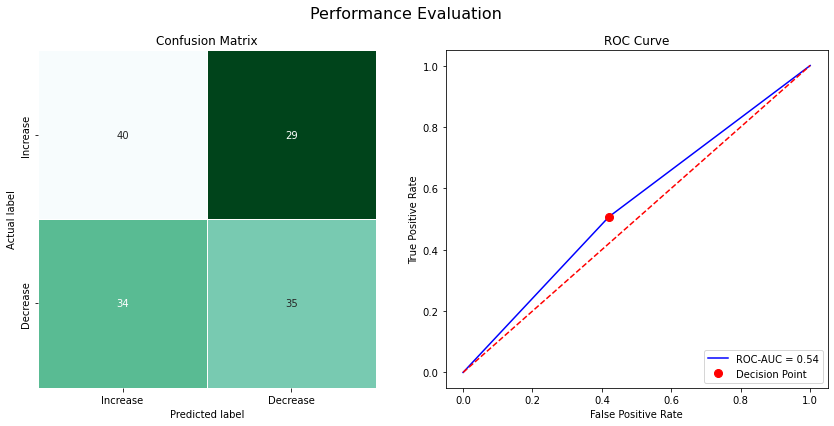

{'accuracy': 0.5434782608695652,
 'precision': 0.546875,
 'recall': 0.5072463768115942,
 'specificity': 0.5797101449275363,
 'f1_score': 0.5263157894736842,
 'cohens_kappa': 0.08695652173913049,
 'roc_auc': 0.5434782608695652,
 'pr_auc': 0.6502490942028986}

In [17]:
LABELS = ['Increase', 'Decrease']
tree_perf = performance_evaluation_report(tree_classifier, 
                                          X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()
plt.show()
tree_perf

Fitting Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=10, n_jobs=-1, random_state=42)
#rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
 #min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
 #bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
 #class_weight=None, ccp_alpha=0.0, max_samples=None)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


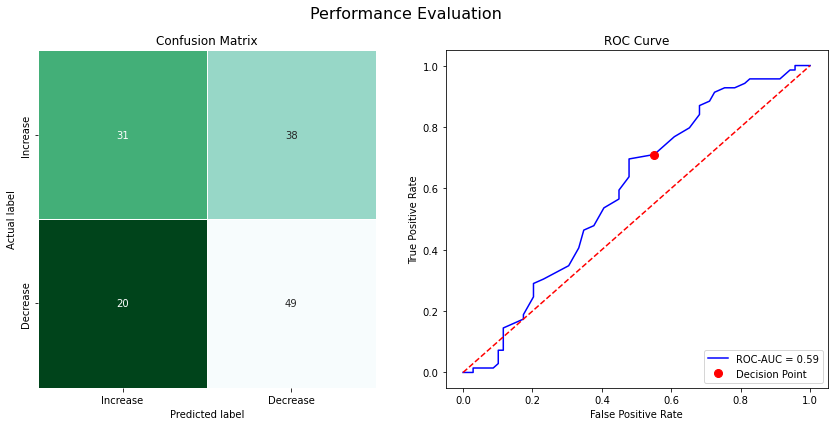

In [20]:
rf_perf = performance_evaluation_report(rf_classifier, 
                                          X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()

In [21]:
rf_perf

{'accuracy': 0.5797101449275363,
 'precision': 0.5632183908045977,
 'recall': 0.7101449275362319,
 'specificity': 0.4492753623188406,
 'f1_score': 0.6282051282051283,
 'cohens_kappa': 0.1594202898550725,
 'roc_auc': 0.5908422600294057,
 'pr_auc': 0.5275358206652443}

{'accuracy': 0.5652173913043478,
 'precision': 0.5584415584415584,
 'recall': 0.6231884057971014,
 'specificity': 0.5072463768115942,
 'f1_score': 0.589041095890411,
 'cohens_kappa': 0.13043478260869568,
 'roc_auc': 0.5687880697332494,
 'pr_auc': 0.5595384806827687}

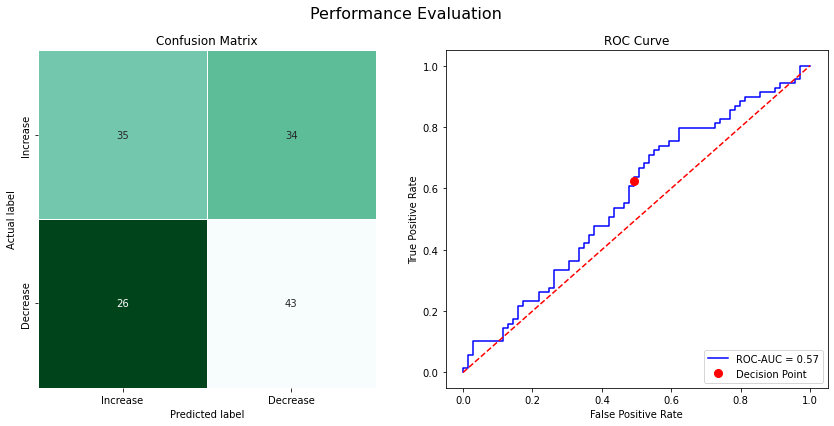

In [22]:
#Fitting a Boosting algorithm
from sklearn.ensemble import GradientBoostingClassifier

%timeit
boost_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, random_state=42)
boost_classifier.fit(X_train, y_train)
y_pred_boost = boost_classifier.predict(X_test)

boost_perf = performance_evaluation_report(boost_classifier, 
                                          X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()

boost_perf

In [23]:
#Tuning hyperparameters
#Cross-validation
from sklearn.model_selection import (GridSearchCV, cross_val_score, 
                                     RandomizedSearchCV, cross_validate, 
                                     StratifiedKFold)
from sklearn import metrics

k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

cross_val_score(rf_classifier, X_train, y_train, cv=k_fold)

cross_validate(rf_classifier, X_train, y_train, cv=k_fold, 
               scoring=['accuracy', 'precision', 'recall', 
                        'roc_auc'])

{'fit_time': array([0.16717434, 0.1178813 , 0.12337136, 0.16552162, 0.11755276]),
 'score_time': array([0.28944564, 0.0799613 , 0.08446074, 0.09193277, 0.08012629]),
 'test_accuracy': array([0.53636364, 0.59090909, 0.63636364, 0.57272727, 0.58181818]),
 'test_precision': array([0.56451613, 0.60294118, 0.62666667, 0.6122449 , 0.6       ]),
 'test_recall': array([0.59322034, 0.69491525, 0.79661017, 0.51724138, 0.62068966]),
 'test_roc_auc': array([0.60933865, 0.59571286, 0.64190761, 0.58703581, 0.58869363])}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 3}
Recall (Training set): 0.8052
Recall (Test set): 0.8841


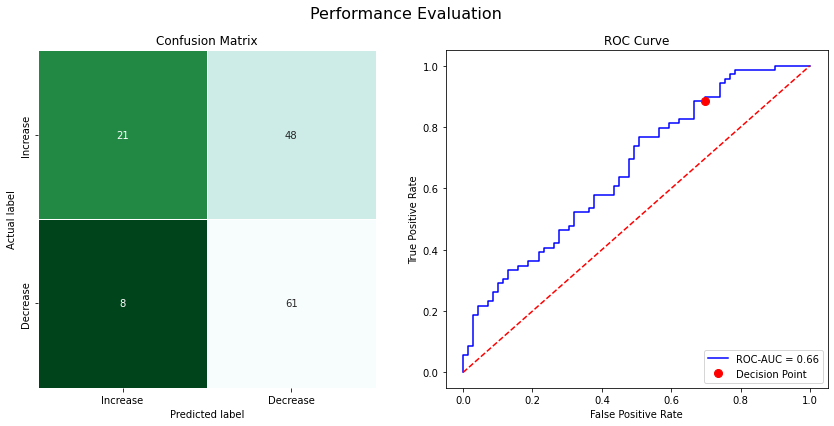

{'accuracy': 0.5942028985507246,
 'precision': 0.5596330275229358,
 'recall': 0.8840579710144928,
 'specificity': 0.30434782608695654,
 'f1_score': 0.6853932584269663,
 'cohens_kappa': 0.18840579710144922,
 'roc_auc': 0.6622558286074354,
 'pr_auc': 0.6665398688690871}

In [24]:
#grid search
param_grid = {'criterion': ['entropy', 'gini'],
              'max_depth': range(3, 6),
              # 'min_samples_leaf': range(2, 6), 
             }

%timeit
classifier_gs = GridSearchCV(rf_classifier, param_grid, scoring='recall', 
                             cv=k_fold, n_jobs=-1, verbose=1)

classifier_gs.fit(X_train, y_train)

print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

LABELS = ['Increase', 'Decrease']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
plt.savefig('ch8_im20.png')
plt.show()

tree_gs_perf

SVM_Classification

In [25]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
clf = svm.SVC(gamma='scale',probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [27]:
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [28]:
print('-' * 50)
print('Training set:')
print('Classification report:')
print(classification_report(y_train, y_pred_train))

--------------------------------------------------
Training set:
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.12      0.19       257
         1.0       0.54      0.92      0.69       293

    accuracy                           0.55       550
   macro avg       0.56      0.52      0.44       550
weighted avg       0.56      0.55      0.46       550



In [29]:
print('.' * 50)
print('Test set:')
print('Classification report:')
print(classification_report(y_test, y_pred))

..................................................
Test set:
Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        69
         1.0       0.50      1.00      0.67        69

    accuracy                           0.50       138
   macro avg       0.25      0.50      0.33       138
weighted avg       0.25      0.50      0.33       138



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
